In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Please write your name below** (in case the file names get mixed up)

In [3]:
#Audrey BOVET

# Clustering

## Probably not K-Means

Remember that in lab 1, we stumbled upon a dataset with two clearly identified clusters, but which K-Means could not usefully separate, because the delimitations were non-linear.

In [4]:
from sklearn import datasets
X_moons, y_moons = sklearn.datasets.make_moons(n_samples=200, shuffle=True, noise=0.05, random_state=42)

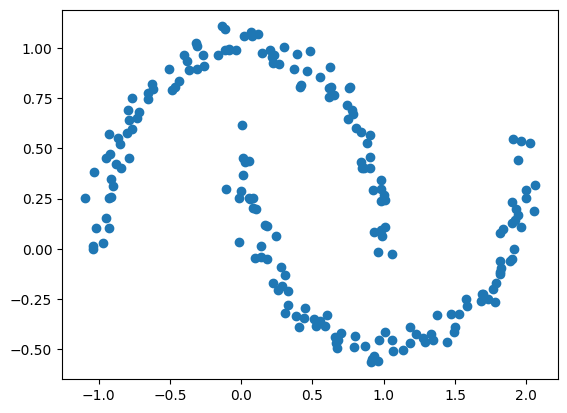

In [5]:
plt.scatter(X_moons[:,0], X_moons[:,1])
plt.show()

**Use a suitable clustering algorithm to assign each point to a cluster. Plot the result.**

You can consider that we know in advance how many clusters we want to obtain. You can (and maybe should) use an existing implementation.

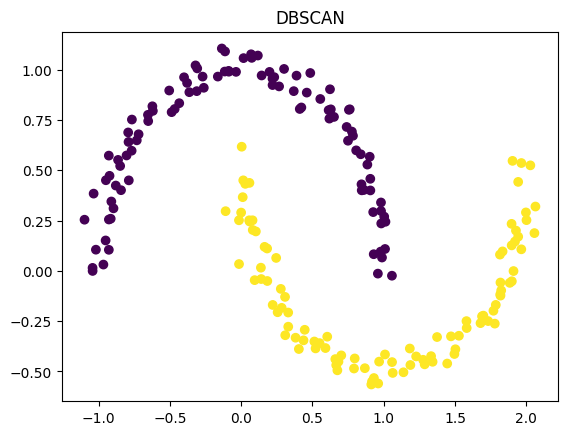

In [7]:
#We have seen in lab 3 that we could use DBSCAN or spectral clustering
from sklearn.cluster import DBSCAN
#Dbscan has 2 hyperparameters, epsilon and P
dbscan = DBSCAN(eps=0.25)#We notice that with epsilon=0.5 which is the default value, it is not working
labels = dbscan.fit_predict(X_moons)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels)
plt.title("DBSCAN")
plt.show()



# Dimensionality reduction

## Data visualization

We will now use the MNIST dataset. It consists of 28x28 pixels images of handwritten digits, for total of 784 dimensions.

We could fetch the whole dataset with

In [8]:
# digits = fetch_openml(name='mnist_784')

However, we are not going to need the full dataset for this lab. Instead, let's load a prepared sample of 1000 handwritten digits.

The dataset can be downloaded here: https://drive.google.com/file/d/1c83lv_Xlw1-bXlWtMXxO6M1qmar3ErkW/view?usp=drive_link

In [9]:
# Load the dataset
# make sure that the file is located in the same folder as the notebook
# (or change the path)
digits = np.load("mnist.npz")

In [10]:
# Define features as X and targets as y
X_digits, y_digits = digits["data"], digits["target"]
print(f"Matrix has dimension {X_digits.shape}")

Matrix has dimension (1000, 784)


Let's display some of the digits.

Conveniently, the first 10 samples are 0, 1, 2, ..., 9. The rest are in a random order.

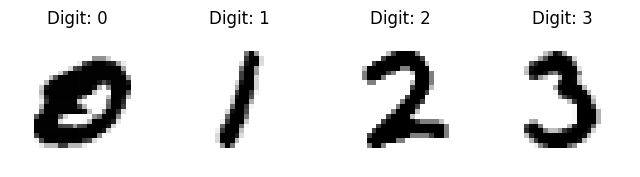

In [11]:
# Display the first 4 digits
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 3)) # Create 4 subplots on 1 row
for ax, x, y in zip(axes, X_digits, y_digits):
    ax.set_axis_off() # do not display scale on axes
    img = x.reshape(28,28) # resize 784 dim vector as an 28 x 28 array of pixels
    ax.imshow(img, cmap=plt.cm.gray_r, vmin=0, vmax=1) # display image in gray scale, with values from 0 to 1
    ax.set_title(f"Digit: {y}")

**Apply PCA to obtained a representation $\mathbf{Z}$ of the data in 2 dimensions.**

You may use the implementation from scikit-learn.

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #as we want the data in 2 dimensions
Z = pca.fit_transform(X_digits) #first I used fit instead of fit transformed but as I wanted to print it I had to use fit_transform


**Plot the corresponding representation. Display the digits as different colors.**

Use a scatter plot. Optionnaly, you may print a legend to know which color correspond to which digit.

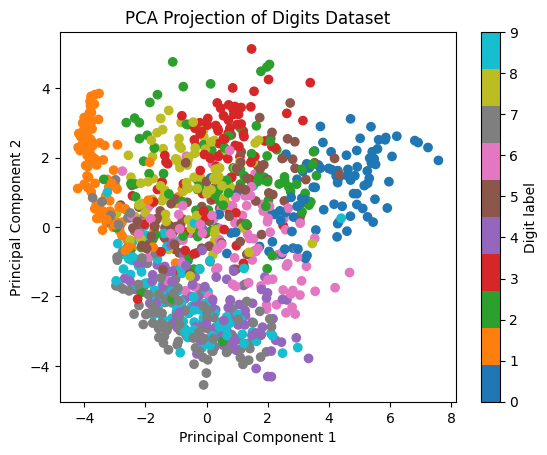

In [13]:
scatter = plt.scatter(Z[:, 0], Z[:, 1], c=y_digits, cmap="tab10")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Digits Dataset")
plt.colorbar(scatter, label="Digit label")
plt.show()


**Are there any hyper-parameters? If yes, which one(s) did you choose?**.

In [14]:
#Yes there are hyperparameters such as n_components or svd_solver (to chose the algorithm to computre the pca)
#We chose n_components = 2 as we want a 2D visualization

**Now do the same things with t-SNE instead.**

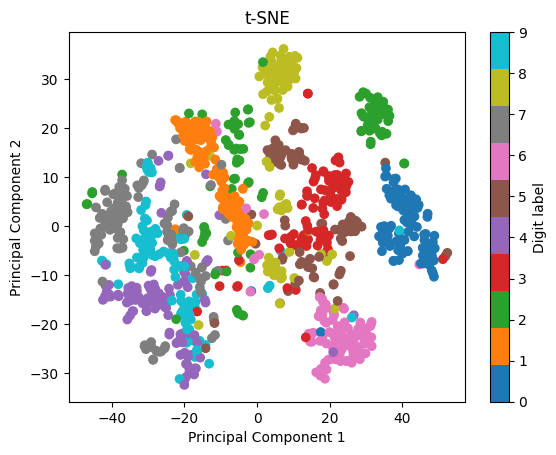

In [16]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, init='random', perplexity=30).fit_transform(X_digits)


scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_digits, cmap="tab10")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("t-SNE")
plt.colorbar(scatter, label="Digit label")
plt.show()

**Are there any hyper-parameters? If yes, which one(s) did you choose?**.

In [ ]:
#Yes there are different hyper-parameters such as n_components. Here we chave chosen 2 as we want a 2D visualization.
#We also choose learning rate, perplexity and init.
#As said in the lecture, t-SNE has one main hyper parameter which is perplexity.
#The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms.
# Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. 
# Different values can result in significantly different results. 
# The perplexity must be less than the number of samples.
#init{“random”, “pca”} or ndarray of shape (n_samples, n_components), default=”pca”
#Initialization of embedding. 
#PCA initialization cannot be used with precomputed distances and is usually more globally stable than random initialization.


**Does one algorithm seem to give "better" results than the other? If yes, which one? Why may that be?** 

In [18]:
#t-SNE seems to give better results than PCA as we can observe separated clusters of digits. 
#t-SNE is supposed to preserve local relationships between data points 
# while PCA only captures global linear variance.

**Just for fun, let's do the same thing with a 3rd dimensionality reduction method. You may pick the one you please.**

Maybe have a look at this documentation: https://scikit-learn.org/dev/modules/manifold.html#manifold-learning

## Data generation

We have seen that we are able to identify some structure in the data. Now let's use this structure to generate new samples!

We will generate some handwritten '5s'.

Since there aren't that many 5s in the initial dataset with 1000 samples, let's load some additional images of 5.

In [19]:
X_five = digits["fives"]
print(f"Matrix has dimension {X_five.shape}")

Matrix has dimension (6313, 784)


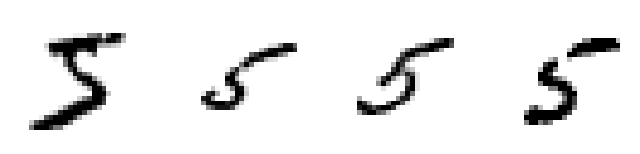

In [20]:
# Display the first 4 fives
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 3)) # Create 4 subplots on 1 row
for ax, x in zip(axes, X_five):
    ax.set_axis_off()
    img = x.reshape(28,28)
    ax.imshow(img, cmap=plt.cm.gray_r, vmin=0, vmax=1)

**What does the "average" 5 look like?**

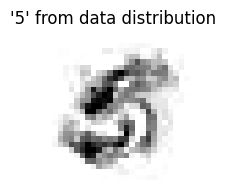

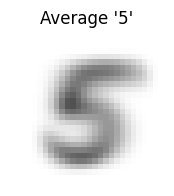

In [ ]:
#I am not sure to understant the question here
#As a human being that does not know nothing to machine learning I would describe a handwritten 5 as an "S". 
#But I guess that here "average" means What does a 5 would look like if generated with the same data distribution as the data set (as it is said in the lecture)
#So yhis is what we would do

#we compute the mean and the covariance of the handwritten five to get the data distribution
mu = np.mean(X_five, axis=0)
cov = np.cov(X_five, rowvar=False)

#create the vector that follow the same distribution as the dataset
x_distrib = np.random.multivariate_normal(mu, cov)

x_distrib = np.clip(x_distrib, 0, 1)

fig, ax = plt.subplots(figsize=(2, 2))
ax.set_axis_off()
img = x_distrib.reshape(28, 28)
ax.imshow(img, cmap=plt.cm.gray_r, vmin=0, vmax=1)
plt.title("'5' from data distribution")
plt.show()

#it is very blurred and not so nice

#now I will print only the average one with only using the mean function

average_five = np.mean(X_five, axis=0)

fig, ax = plt.subplots(figsize=(2, 2))
ax.set_axis_off()
img = average_five.reshape(28, 28)
ax.imshow(img, cmap=plt.cm.gray_r, vmin=0, vmax=1)
plt.title("Average '5'")
plt.show()

#The Average is just blurred but seems to be better thant the one generated with distribution


To help you make a hopefully clear link between the slides from the lecture and an actual implementation of PCA, I provided a **commented implementation** of PCA that is reasonably close to what we covered in class. You will find it at the end of this notebook.

The name of the functions and attributes I use are the same as the ones from scikit-learn, to not induce any confusion.

You are free to use either this version, or the one from scikit-learn while using this as a reference to what is happening behind the scene. You are also free to not look at it at all, do as you please.

**Apply PCA to obtained a representation $\mathbf{Z}$ of the data in 2 dimensions. Then, apply the reverse transformation to reconstruct $\hat{\mathbf{X}}$ in 784 dimensions from its low dimension representation.**

**Important**: you need to reconstruct $\hat{\mathbf{X}}$ *from* $\mathbf{Z}$.

In [29]:
class MyPCA:
    """
    Implementation of PCA similar to scikit-learn
    """
    
    def __init__(self, n_components: int=2) -> None:
        """
        Init
        
        Args:
            n_components: P
        """
        self.n_components = n_components # P
        # Initialize empty attributes
        self.mean_ = None
        self.singular_values_ = None
        self.components_ = None
        
    def fit(self, X: np.ndarray) -> None:
        """
        Compute principal components from data
        
        Args:
            X: matrix of size N x D
            
        Result (stored):
            mean_: mu, vector of size D
            singular_values_: lambdas, vector of size P
            components_: matrix P, matrix of size P x D
        """
        N, D = X.shape
        self.mean_ = X.mean(axis=0) # mean (mu)
        X = X - self.mean_ # center: substract mean
        
        # Implementation from class: actually not robust
        """
        cov = X.T @ X / N # compute covariance matrix
        values, components = np.linalg.eig(cov) # get eigen values/vectors
        self.singular_values_ = np.sqrt(values)[:self.n_components] # keep first P singular values
        self.components_ = components.T[:self.n_components] # keep first P principal components
        """
        # Alternative implementation with SVD
        U, S, Vt = np.linalg.svd(X, full_matrices=False)  # U: N x N, S: min(N, D), Vt: D x D
        self.singular_values_ = S[:self.n_components] # keep first P singular values
        self.singular_values_ = self.singular_values_  / np.sqrt(N) # SVD does not normalize w.r.t. sample size
        self.components_ = Vt[:self.n_components] # keep first P principal components
    
    def transform(self, X: np.ndarray) -> np.ndarray:
        """
        Return coordinates of input in principal components basis
        
        Args:
            X: matrix of size N x D, coordinates in high-dim space
            
        Returns:
            Z: matrix of size N x P, coordinates in p.c. space
        """
        X = X - self.mean_ # center: substract mean
        Z = X @ self.components_.T  # project to p.c. basis
        return Z / self.singular_values_  # scale by singular values
    
    def inverse_transform(self, Z: np.ndarray) -> np.ndarray:
        """
        Maps back to high-dim space from coordinates in p.c. space
        
        Args:
            Z: matrix of size N x P, coordinates in p.c. space
                    
        Returns:
            X: matrix of size N x D, coordinates in high dim space
        """
        Z = Z * self.singular_values_ # "un-normalize" standard deviations
        X = Z @ self.components_ # compute coordinates in initial space
        return X + self.mean_ # "uncenter" by adding the mean
    
    def fit_transform(self, X: np.ndarray) -> np.ndarray:
        """
        Combination of fit and transform
        """
        self.fit(X)
        return self.transform(X)

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #as we want the data in 2 dimensions
Z = pca.fit_transform(X_five) #first I used fit instead of fit transformed but as I wanted to print it I had to use fit_transform
#same code as previousky
#thank you for the class mypca, I used the sklearn one but I will try yours to see of there are any differences with what I am doing

mypca = MyPCA(n_components=2)
myZ = mypca.fit_transform(X_five)

#it is the same image but in a mirror, depends on the sign of the eigenvectors

In [55]:
MYX_hat = mypca.inverse_transform(Z) 
print("MYX_hat shape:", MYX_hat.shape)

from sklearn.decomposition import PCA

X_hat = pca.inverse_transform(Z) 
print("X_hat shape:", X_hat.shape)

mse = np.mean((X_five - X_hat) ** 2, axis=1)
print("Mean reconstruction MSE:", mse.mean())

plt.show()

MYX_hat shape: (6313, 784)
X_hat shape: (6313, 784)
Mean reconstruction MSE: 0.044747088431807865


**Display some samples from the original dataset, along with some reconstructed samples**

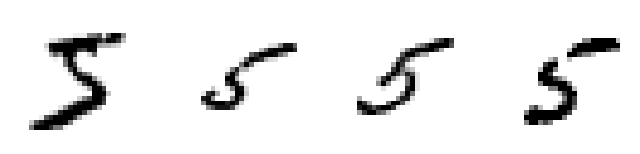

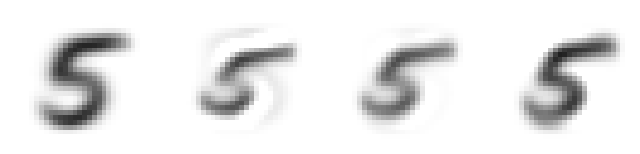

In [56]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 3)) # Create 4 subplots on 1 row
for ax, x in zip(axes, X_five):
    ax.set_axis_off()
    img = x.reshape(28,28)
    ax.imshow(img, cmap=plt.cm.gray_r, vmin=0, vmax=1)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 3)) # Create 4 subplots on 1 row
for ax, x in zip(axes, X_hat):
    ax.set_axis_off()
    img = x.reshape(28,28)
    ax.imshow(img, cmap=plt.cm.gray_r, vmin=0, vmax=1)


**What do you notice?**

In [0]:
#the one from the reconstructed are completely blurred and not so good

**Now do the same, but this time keeping 10 dimensions (i.e. 10 principal components), then 50, then 200 (out of 784).**

X_hat shape: (6313, 784)


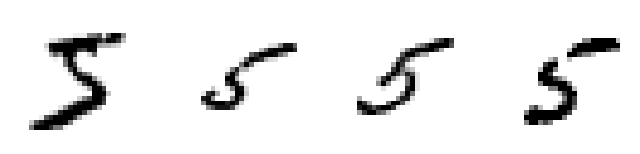

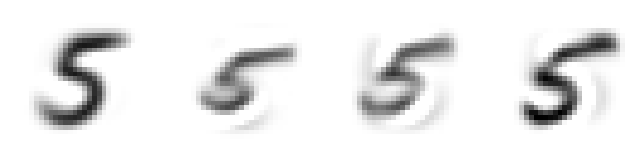

In [57]:
#n_components = 10

from sklearn.decomposition import PCA
pca = PCA(n_components=10) #as we want the data in 2 dimensions
Z = pca.fit_transform(X_five)


X_hat = pca.inverse_transform(Z) 
print("X_hat shape:", X_hat.shape)



_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 3)) # Create 4 subplots on 1 row
for ax, x in zip(axes, X_five):
    ax.set_axis_off()
    img = x.reshape(28,28)
    ax.imshow(img, cmap=plt.cm.gray_r, vmin=0, vmax=1)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 3)) # Create 4 subplots on 1 row
for ax, x in zip(axes, X_hat):
    ax.set_axis_off()
    img = x.reshape(28,28)
    ax.imshow(img, cmap=plt.cm.gray_r, vmin=0, vmax=1)

X_hat shape: (6313, 784)


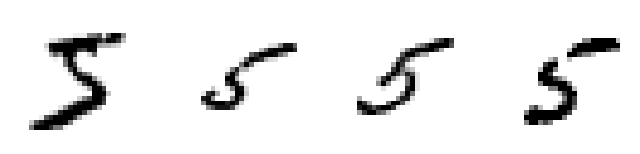

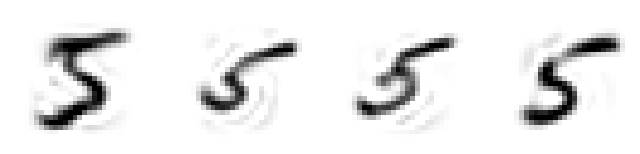

In [58]:
#n_components = 50

from sklearn.decomposition import PCA
pca = PCA(n_components=50) #as we want the data in 2 dimensions
Z = pca.fit_transform(X_five)


X_hat = pca.inverse_transform(Z) 
print("X_hat shape:", X_hat.shape)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 3)) # Create 4 subplots on 1 row
for ax, x in zip(axes, X_five):
    ax.set_axis_off()
    img = x.reshape(28,28)
    ax.imshow(img, cmap=plt.cm.gray_r, vmin=0, vmax=1)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 3)) # Create 4 subplots on 1 row
for ax, x in zip(axes, X_hat):
    ax.set_axis_off()
    img = x.reshape(28,28)
    ax.imshow(img, cmap=plt.cm.gray_r, vmin=0, vmax=1)

X_hat shape: (6313, 784)


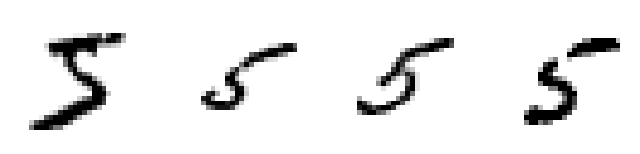

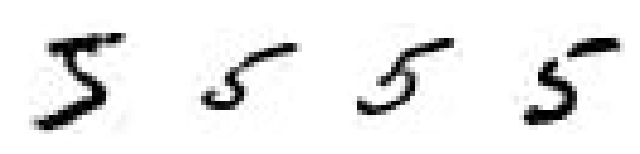

In [60]:
#n_components = 200

from sklearn.decomposition import PCA
pca = PCA(n_components=200) #as we want the data in 2 dimensions
Z = pca.fit_transform(X_five)


X_hat = pca.inverse_transform(Z) 
print("X_hat shape:", X_hat.shape)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 3)) # Create 4 subplots on 1 row
for ax, x in zip(axes, X_five):
    ax.set_axis_off()
    img = x.reshape(28,28)
    ax.imshow(img, cmap=plt.cm.gray_r, vmin=0, vmax=1)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 3)) # Create 4 subplots on 1 row
for ax, x in zip(axes, X_hat):
    ax.set_axis_off()
    img = x.reshape(28,28)
    ax.imshow(img, cmap=plt.cm.gray_r, vmin=0, vmax=1)

**Do you notice a trend?**

In [51]:
#If n-components is big (so closer to 784), the digits reconstructed are nicer and closer to the initial digits

This can actually be quantified with *explained variance*: recall from class that the first principal component corresponds to the axis with the largest variance, corresponding to the largest eigenvalue. But there may still be some variance left in other directions in the data, that would require other principal components.
The second principal component is the one with the second largest variance. Using this component in addition to the first one enables us to capture, or "explain", a bit more of the total variance of the data. Adding the third principal component lets us explain even more variance, and so on.

We can consider that the total variance of the data is the sum of the variances along all axes. By summing the variance of all principal components and dividing by the total variance, we can thus measure what percentage of the total variance we can explain with a given number of principal components.

In [61]:
# Measuring the explained variance for different numbers of principal components
for P in [2,10,50,200]:
    pca = PCA(n_components=P)
    Z = pca.fit_transform(X_five)
    # we use the explained variance method:
    # this gives us the explained variance for each of our P components,
    # normalized so that the total variance for P=D would be 1.
    explained_variance = pca.explained_variance_ratio_.sum()
    print(f"Explained variance with {P} components: {explained_variance:.3f}")

Explained variance with 2 components: 0.262
Explained variance with 10 components: 0.554
Explained variance with 50 components: 0.851
Explained variance with 200 components: 0.976


As you can see, using only 2 components only captures about a quarter of the total variance. This explains why reconstructed fives are quite different: we are missing quite a lot of information.

On the other hand, with 200, we capture 97%+ of the variance: the reconstructed fives are almost identical to the original ones. But we have "reduced the dimension a lot less", since we still have 200 dimensions in our reduced dataset.

Finally, using 784 components (as many as the initial dimension of the data) would enable us to have 100% explained variance, but at the cost of not having reduced the dimension of the data at all.

**Find the number of components needed to explain at least 50% of the variance.**

Remember that the principal components should be independant (or more exactly, uncorrelated). We can therefore sample some data independently along each axis, and combine the sampled vectors to approximately match the distribution of the dataset.

**Using a vector space with the same number of dimensions, generate vectors along the principal components independently. Then, use these reduced dimension representations to reconstruct samples in the original image space.**

This is probably the hardest question you have met in this class (so far). Do not hesitate to ask for help.

Hint: if you use the scikit-learn implementation, there is a parameter whose default value should be changed to ensure that your coordinates z in principal component space have unit variance.

You may want to check the doc: https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
    
In general, it is a good habit to look at the documentation of the implementations we are using, to ensure that everything behaves as we expect by default, and that we are not missing something important.

**Plot the resulting images.**

**Are all the generated numbers indistinguishable from the original numbers?**

***Optional: what may be the reason?***

### Appendix: implementation of PCA

In [28]:
class MyPCA:
    """
    Implementation of PCA similar to scikit-learn
    """
    
    def __init__(self, n_components: int=2) -> None:
        """
        Init
        
        Args:
            n_components: P
        """
        self.n_components = n_components # P
        # Initialize empty attributes
        self.mean_ = None
        self.singular_values_ = None
        self.components_ = None
        
    def fit(self, X: np.ndarray) -> None:
        """
        Compute principal components from data
        
        Args:
            X: matrix of size N x D
            
        Result (stored):
            mean_: mu, vector of size D
            singular_values_: lambdas, vector of size P
            components_: matrix P, matrix of size P x D
        """
        N, D = X.shape
        self.mean_ = X.mean(axis=0) # mean (mu)
        X = X - self.mean_ # center: substract mean
        
        # Implementation from class: actually not robust
        """
        cov = X.T @ X / N # compute covariance matrix
        values, components = np.linalg.eig(cov) # get eigen values/vectors
        self.singular_values_ = np.sqrt(values)[:self.n_components] # keep first P singular values
        self.components_ = components.T[:self.n_components] # keep first P principal components
        """
        # Alternative implementation with SVD
        U, S, Vt = np.linalg.svd(X, full_matrices=False)  # U: N x N, S: min(N, D), Vt: D x D
        self.singular_values_ = S[:self.n_components] # keep first P singular values
        self.singular_values_ = self.singular_values_  / np.sqrt(N) # SVD does not normalize w.r.t. sample size
        self.components_ = Vt[:self.n_components] # keep first P principal components
    
    def transform(self, X: np.ndarray) -> np.ndarray:
        """
        Return coordinates of input in principal components basis
        
        Args:
            X: matrix of size N x D, coordinates in high-dim space
            
        Returns:
            Z: matrix of size N x P, coordinates in p.c. space
        """
        X = X - self.mean_ # center: substract mean
        Z = X @ self.components_.T  # project to p.c. basis
        return Z / self.singular_values_  # scale by singular values
    
    def inverse_transform(self, Z: np.ndarray) -> np.ndarray:
        """
        Maps back to high-dim space from coordinates in p.c. space
        
        Args:
            Z: matrix of size N x P, coordinates in p.c. space
                    
        Returns:
            X: matrix of size N x D, coordinates in high dim space
        """
        Z = Z * self.singular_values_ # "un-normalize" standard deviations
        X = Z @ self.components_ # compute coordinates in initial space
        return X + self.mean_ # "uncenter" by adding the mean
    
    def fit_transform(self, X: np.ndarray) -> np.ndarray:
        """
        Combination of fit and transform
        """
        self.fit(X)
        return self.transform(X)